In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


df1 = pd.read_csv("StudentPerformance.csv")

In [105]:
#look at first few rows of data

df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [106]:
#general information about columns

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [107]:
#change columns to snake case

dfs = [df1]
       
for df in dfs:
    df.rename(columns=lambda col: col.replace(' ', '_'), inplace=True)

In [108]:
#check for null values

df1.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

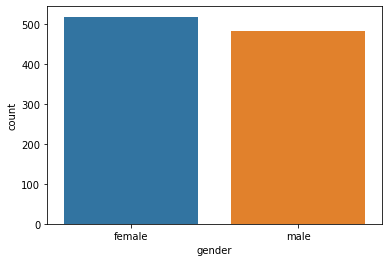

In [109]:
#create countplots for first few variables
sns.countplot(data=df1, x="gender")

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

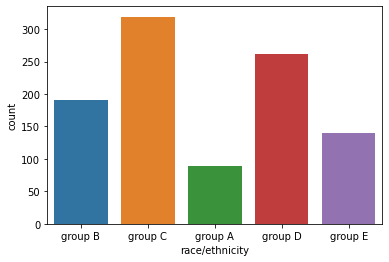

In [110]:
sns.countplot(data=df1, x="race/ethnicity")

<AxesSubplot:xlabel='lunch', ylabel='count'>

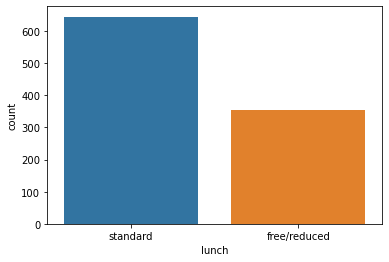

In [111]:
sns.countplot(data=df1, x="lunch")

<AxesSubplot:xlabel='test_preparation_course', ylabel='count'>

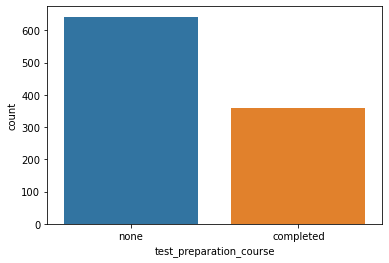

In [112]:
sns.countplot(data=df1, x="test_preparation_course")

In [113]:
df1["parental_level_of_education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [115]:
#add average score columns

df1["average_score"] = ((df1["math_score"] + df1["reading_score"] + df1["writing_score"]) / 3).round(1)

In [116]:
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0
996,male,group C,high school,free/reduced,none,62,55,55,57.3
997,female,group C,high school,free/reduced,completed,59,71,65,65.0
998,female,group D,some college,standard,completed,68,78,77,74.3


In [117]:
#state if student passed math exam - assuming passing is 60%+

def pass_math(row):
    if row["math_score"] >= 60:
        return "pass"
    else:
        return "fail"
    


df1.apply (lambda row: pass_math(row), axis=1)


df1['pass_math'] = df1.apply (lambda row: pass_math(row), axis=1)

In [118]:
#state if student passed reading exam - assuming passing is 60%+

def pass_reading(row):
    if row["reading_score"] >= 60:
        return "pass"
    else:
        return "fail"
    


df1.apply (lambda row: pass_reading(row), axis=1)


df1['pass_reading'] = df1.apply (lambda row: pass_reading(row), axis=1)

In [119]:
#state if student passed writing exam - assuming passing is 60%+

def pass_writing(row):
    if row["writing_score"] >= 60:
        return "pass"
    else:
        return "fail"
    


df1.apply (lambda row: pass_writing(row), axis=1)


df1['pass_writing'] = df1.apply (lambda row: pass_writing(row), axis=1)

In [128]:
#state if student passed on three exams

def passed_all(row):
    if (row["writing_score"] >= 60 and row["reading_score"] >= 60 and row["math_score"] >= 60):
        return "pass"
    else:
        return "fail"
    


df1.apply (lambda row: passed_all(row), axis=1)


df1['passed_all'] = df1.apply (lambda row: passed_all(row), axis=1)

In [129]:
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,pass_math,pass_reading,pass_writing,passed_all
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7,pass,pass,pass,pass
1,female,group C,some college,standard,completed,69,90,88,82.3,pass,pass,pass,pass
2,female,group B,master's degree,standard,none,90,95,93,92.7,pass,pass,pass,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3,fail,fail,fail,fail
4,male,group C,some college,standard,none,76,78,75,76.3,pass,pass,pass,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0,pass,pass,pass,pass
996,male,group C,high school,free/reduced,none,62,55,55,57.3,pass,fail,fail,fail
997,female,group C,high school,free/reduced,completed,59,71,65,65.0,fail,pass,pass,fail
998,female,group D,some college,standard,completed,68,78,77,74.3,pass,pass,pass,pass


In [130]:
df1.describe()

,math_score,reading_score,writing_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.769800
std,15.16308,14.600192,15.195657,14.257197
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.300000
50%,66.00000,70.000000,69.000000,68.300000
75%,77.00000,79.000000,79.000000,77.700000
max,100.00000,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='pass_math', ylabel='count'>

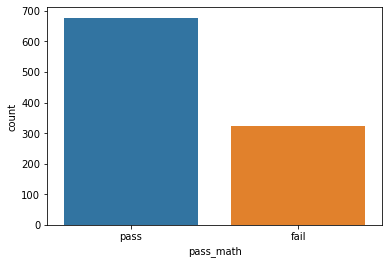

In [124]:
sns.countplot(data=df1, x="pass_math")


#Most students passed the math exam

<AxesSubplot:xlabel='pass_reading', ylabel='count'>

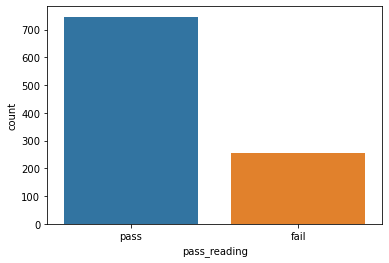

In [125]:
sns.countplot(data=df1, x="pass_reading")

#Most students passed the reading exam; even more than the math exam

<AxesSubplot:xlabel='pass_writing', ylabel='count'>

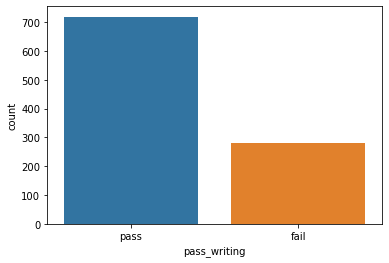

In [126]:
sns.countplot(data=df1, x="pass_writing")

#Most students passed the writing exam

<AxesSubplot:xlabel='passed_all', ylabel='count'>

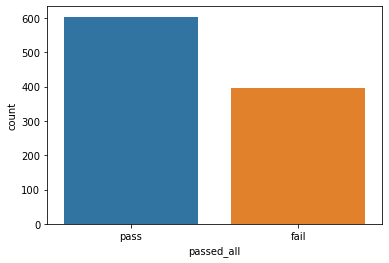

In [131]:
sns.countplot(data=df1, x="passed_all")

#Most students passed all three exams, but at a lower rate than each of the individual exams

<AxesSubplot:xlabel='race/ethnicity', ylabel='average_score'>

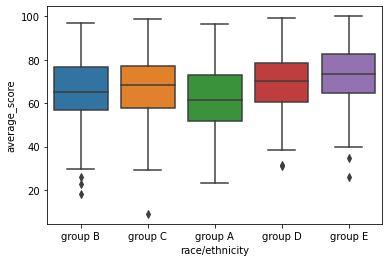

In [132]:
sns.boxplot(data=df1, x="race/ethnicity", y="average_score")

#Group E has the highest averaage score; Group A has the lowest average

<AxesSubplot:xlabel='test_preparation_course', ylabel='average_score'>

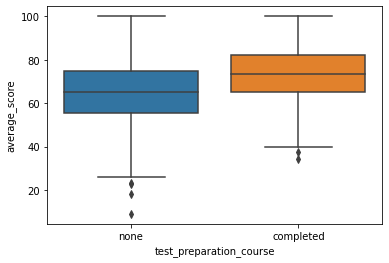

In [133]:
sns.boxplot(data=df1, x="test_preparation_course", y="average_score")

#Students who completed the test preparation course had a higher average score than those who did not

<AxesSubplot:xlabel='lunch', ylabel='average_score'>

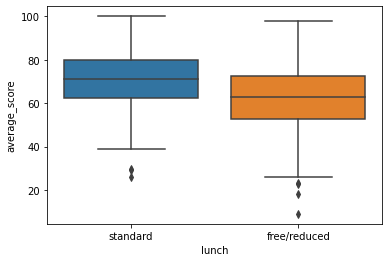

In [134]:
sns.boxplot(data=df1, x="lunch", y="average_score")

#Students who pay the standard price for lunch had a higher average score than those who recieve free/reduced lunch

<AxesSubplot:xlabel='gender', ylabel='average_score'>

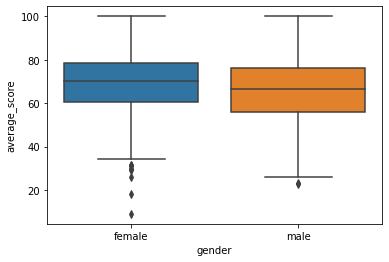

In [135]:
sns.boxplot(data=df1, x="gender", y="average_score")

#Girls have a higher average score than male students

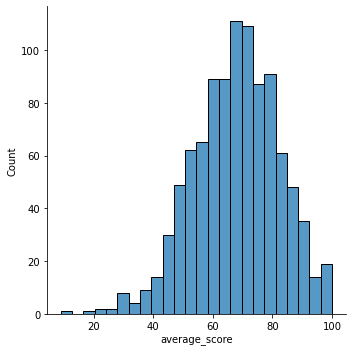

In [136]:
sns.displot(df1["average_score"])

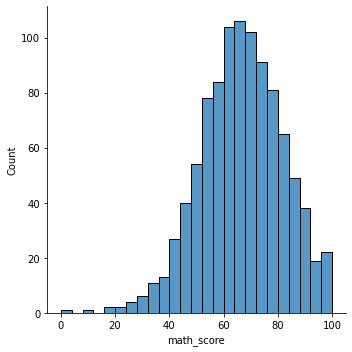

In [137]:
sns.displot(df1["math_score"])

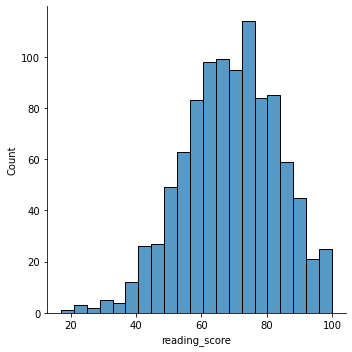

In [138]:
sns.displot(df1["reading_score"])

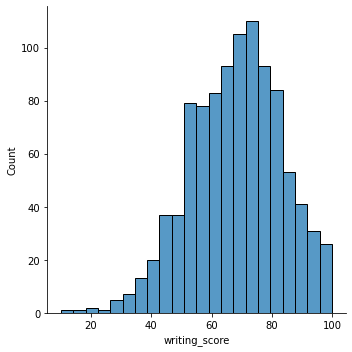

In [139]:
sns.displot(df1["writing_score"])

In [140]:
matrix = df1.corr()

In [141]:
matrix

,math_score,reading_score,writing_score,average_score
math_score,1.000000,0.817580,0.802642,0.918730
reading_score,0.817580,1.000000,0.954598,0.970328
writing_score,0.802642,0.954598,1.000000,0.965680
average_score,0.918730,0.970328,0.965680,1.000000


In [145]:
#encode gender, lunch, test_preparation, pass variables using replace

df1['gender'] = df1['gender'].replace({'female':0, 'male':1})
df1['lunch'] = df1['lunch'].replace({'standard':0, 'free/reduced':1})
df1['test_preparation_course'] = df1['test_preparation_course'].replace({'none':0, 'completed':1})
df1[['pass_math', "pass_reading", "pass_writing", "passed_all"]] = df1[['pass_math', "pass_reading",
                                                                      "pass_writing", "passed_all"]].replace({'fail':0, 'pass':1})
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,pass_math,pass_reading,pass_writing,passed_all
0,0,group B,bachelor's degree,0,0,72,72,74,72.7,1,1,1,1
1,0,group C,some college,0,1,69,90,88,82.3,1,1,1,1
2,0,group B,master's degree,0,0,90,95,93,92.7,1,1,1,1
3,1,group A,associate's degree,1,0,47,57,44,49.3,0,0,0,0
4,1,group C,some college,0,0,76,78,75,76.3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,0,1,88,99,95,94.0,1,1,1,1
996,1,group C,high school,1,0,62,55,55,57.3,1,0,0,0
997,0,group C,high school,1,1,59,71,65,65.0,0,1,1,0
998,0,group D,some college,0,1,68,78,77,74.3,1,1,1,1


In [146]:
#encode race/ethnicity variable using replace

df1["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [147]:
df1["race/ethnicity"] = df1['race/ethnicity'].replace({'group A':0, 'group B':1, 'group C':2, 'group D':3, 
                                                      'group E':4})
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,pass_math,pass_reading,pass_writing,passed_all
0,0,1,bachelor's degree,0,0,72,72,74,72.7,1,1,1,1
1,0,2,some college,0,1,69,90,88,82.3,1,1,1,1
2,0,1,master's degree,0,0,90,95,93,92.7,1,1,1,1
3,1,0,associate's degree,1,0,47,57,44,49.3,0,0,0,0
4,1,2,some college,0,0,76,78,75,76.3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,master's degree,0,1,88,99,95,94.0,1,1,1,1
996,1,2,high school,1,0,62,55,55,57.3,1,0,0,0
997,0,2,high school,1,1,59,71,65,65.0,0,1,1,0
998,0,3,some college,0,1,68,78,77,74.3,1,1,1,1


In [154]:
df1["parental_level_of_education"] = df1["parental_level_of_education"].replace({"some high school": 0, "high school":1, "some college":2, "associate's degree":3, 
                                                      "bachelor's degree":4, "master's degree":5})

In [155]:
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,pass_math,pass_reading,pass_writing,passed_all
0,0,1,4,0,0,72,72,74,72.7,1,1,1,1
1,0,2,2,0,1,69,90,88,82.3,1,1,1,1
2,0,1,5,0,0,90,95,93,92.7,1,1,1,1
3,1,0,3,1,0,47,57,44,49.3,0,0,0,0
4,1,2,2,0,0,76,78,75,76.3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95,94.0,1,1,1,1
996,1,2,1,1,0,62,55,55,57.3,1,0,0,0
997,0,2,1,1,1,59,71,65,65.0,0,1,1,0
998,0,3,2,0,1,68,78,77,74.3,1,1,1,1


In [156]:
matrix2 = df1.corr()


In [157]:
matrix2

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,pass_math,pass_reading,pass_writing,passed_all
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,0.167982,-0.244313,-0.301225,-0.130925,0.127048,-0.186531,-0.229557,-0.027184
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.216415,0.145253,0.165691,0.185137,0.164929,0.105660,0.124826,0.166246
parental_level_of_education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.159432,0.190908,0.236715,0.205825,0.082285,0.126816,0.158155,0.110841
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.350877,-0.229560,-0.245769,-0.290061,-0.269637,-0.191219,-0.205709,-0.252280
test_preparation_course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.177702,0.241780,0.312946,0.256762,0.127725,0.167389,0.234805,0.175329
math_score,0.167982,0.216415,0.159432,-0.350877,0.177702,1.000000,0.817580,0.802642,0.918730,0.771653,0.613084,0.623881,0.748505
reading_score,-0.244313,0.145253,0.190908,-0.229560,0.241780,0.817580,1.000000,0.954598,0.970328,0.641648,0.754839,0.742682,0.737133
writing_score,-0.301225,0.165691,0.236715,-0.245769,0.312946,0.802642,0.954598,1.000000,0.965680,0.629578,0.734908,0.779009,0.731709
average_score,-0.130925,0.185137,0.205825,-0.290061,0.256762,0.918730,0.970328,0.965680,1.000000,0.716190,0.736066,0.751420,0.776899
pass_math,0.127048,0.164929,0.082285,-0.269637,0.127725,0.771653,0.641648,0.629578,0.716190,1.000000,0.604053,0.586311,0.851276


In [158]:
df2 = df1[["gender", "race/ethnicity", "parental_level_of_education", "lunch", "test_preparation_course",
          "passed_all"]]

In [159]:
matrix3 = df2.corr()

In [160]:
matrix3

#lunch - meaning income - has the highest correlation with whether a student will pass all three exams or not, 
# followed by the test prep course, then race/ethnicity, and then parental level of education. Gender has the weakest
#correlation

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,passed_all
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,-0.027184
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.166246
parental_level_of_education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.110841
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.252280
test_preparation_course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.175329
passed_all,-0.027184,0.166246,0.110841,-0.252280,0.175329,1.000000


In [161]:
df3 = df1[["gender", "race/ethnicity", "parental_level_of_education", "lunch", "test_preparation_course",
          "average_score"]]

In [163]:
matrix4 = df3.corr()
matrix4

#When looking at average scores, the variables have a stronger correlation and the order changes slightly. Lunch
#still has the strongest correlation, then the test prep course. However, parental education is slightly stronger
# than race/ethnicity and gender has a slightly stronger correlation with the average score.

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,average_score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,-0.130925
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.185137
parental_level_of_education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.205825
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.290061
test_preparation_course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.256762
average_score,-0.130925,0.185137,0.205825,-0.290061,0.256762,1.000000


In [172]:
#logistic regression to predict whether a student will pass all three exams or not

log_df = df2.copy()

log_df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,passed_all
0,0,1,4,0,0,1
1,0,2,2,0,1,1
2,0,1,5,0,0,1
3,1,0,3,1,0,0
4,1,2,2,0,0,1
...,...,...,...,...,...,...
995,0,4,5,0,1,1
996,1,2,1,1,0,0
997,0,2,1,1,1,0
998,0,3,2,0,1,1


In [171]:
#select features and target
X = log_df.drop("passed_all", axis=1)
y = log_df[["passed_all"]]

In [173]:
from sklearn.model_selection import train_test_split


#split into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=0)

In [174]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [175]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [176]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6480


In [177]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [178]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6867
Test set score: 0.6480


In [179]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 43  56]
 [ 32 119]]

True Positives(TP) =  43

True Negatives(TN) =  119

False Positives(FP) =  56

False Negatives(FN) =  32


<AxesSubplot:>

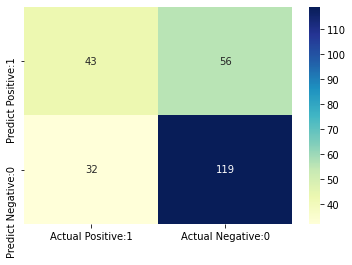

In [181]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [187]:
y_test.value_counts()

null_accuracy = 151/(151+99)

null_accuracy

0.604

In [180]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.43      0.49        99
           1       0.68      0.79      0.73       151

    accuracy                           0.65       250
   macro avg       0.63      0.61      0.61       250
weighted avg       0.64      0.65      0.64       250



In [188]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.65333333 0.67333333 0.67333333 0.68666667 0.70666667]


C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [189]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.6787


In [190]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [191]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.6800


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [201]:
#run linear regression to predict average student scores

lin_df = df3.copy()

lin_df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,average_score
0,0,1,4,0,0,72.7
1,0,2,2,0,1,82.3
2,0,1,5,0,0,92.7
3,1,0,3,1,0,49.3
4,1,2,2,0,0,76.3
...,...,...,...,...,...,...
995,0,4,5,0,1,94.0
996,1,2,1,1,0,57.3
997,0,2,1,1,1,65.0
998,0,3,2,0,1,74.3


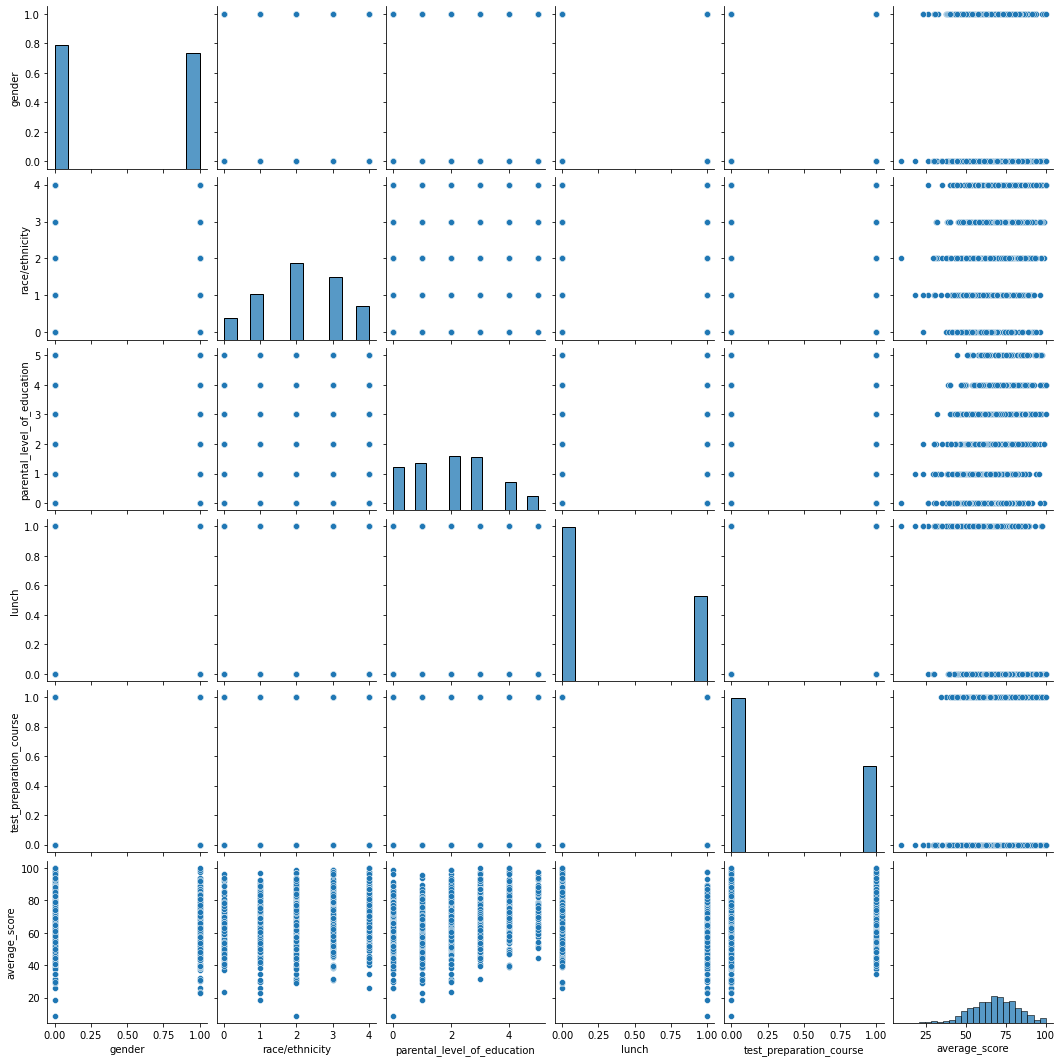

In [199]:
sns.pairplot(data=lin_df)

In [195]:
X = lin_df.drop("average_score", axis=1)
y = lin_df["average_score"]

In [196]:
#split into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=0)

In [198]:
from sklearn.linear_model import LinearRegression

# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.1612877993202264

In [200]:
model.coef_

array([-4.13470124,  1.78977154,  2.00065752, -9.0885591 ,  7.92299287])

In [202]:
model.intercept_

62.26421797604953

In [203]:
model.predict(X_test)

array([66.54760359, 58.62247329, 62.54415111, 58.41158731, 69.84507611,
       69.63205269, 73.84639115, 67.71103239, 77.21291082, 65.49948889,
       69.84507611, 60.96740299, 77.63468278, 67.71103239, 66.88973833,
       58.75585948, 61.9199458 , 83.77004154, 72.26750559, 74.0551397 ,
       68.05530456, 64.54694607, 70.05596209, 67.92191837, 62.41290235,
       58.62247329, 65.92126085, 69.84293867, 58.75585948, 77.76806897,
       56.96608794, 73.63336773, 68.26619055, 66.05464704, 68.46862389,
       67.71103239, 77.63682022, 71.63271021, 79.7687265 , 69.63419013,
       67.50014641, 54.62115824, 60.13017426, 81.55849804, 62.54628855,
       79.7687265 , 65.84376106, 60.75651701, 85.55981308, 64.75783205,
       67.71103239, 56.83270175, 56.75520196, 63.70971734, 70.33589522,
       66.54760359, 64.54694607, 69.71168991, 73.21159577, 64.54694607,
       62.41290235, 79.34695453, 72.25905295, 67.71103239, 67.84228114,
       60.54349359, 65.49948889, 65.84376106, 71.97698238, 70.05

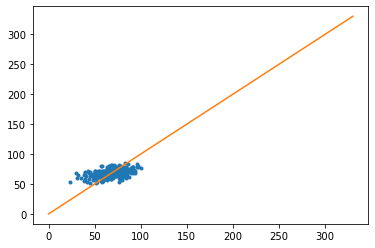

In [204]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()